# Projeto Grupo BT-G3


## **Integrantes do grupo**
- Daniel Barzilai
- Larissa Carvalho
- Maria Luisa Maia
- Pedro Rezende
- Rafael Moritz
- Vitor Oliveira

<center><img src="https://www.inteli.edu.br/wp-content/uploads/2021/08/20172028/marca_1-2.png" width="50%" height="50%"/></center>

<h1 align='center'><b>IA para Marketing: Monitoramento de campanhas utilizando processamento de linguagem natural (PLN)<b></h1>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/c/c2/Btg-logo-blue.svg" width="50%" height="50%"/></center>

<h2 align='center'>O Banco BTG Pactual enfrenta um desafio na área de Marketing em entender as necessidades e demandas dos clientes de maneira fácil e rápida nas redes sociais. A solução proposta para esse problema foi o desenvolvimento de uma Inteligência Artificial utilizando processamento de linguagem natural (PLN), capaz de monitorar as campanhas de marketing, voltadas para o Instagram. O objetivo principal dessa solução é rastrear os dados em tempo real, analisar e interpretar as mensagens e comentários enviados pelos clientes na rede social, a fim de identificar as necessidades e demandas de forma precisa e eficiente.</h2>

---

# Sobre os dados

Esse projeto está utilizando dados coletados e tratados pela equipe de Automation do BTG Pactual, o qual disponibilizou o dataset. Com base nas informações dispostas nesse dataset, realizaremos insights a cerca dos comentários feitos nos posts do Instagram do próprio banco. Vale lembrar que os dados estão anonimizados e resguardados para manter a privacidade e ética com os usuários e com o banco.

# 1. Instalação / Setup

Para o início do projeto, fizemos o desenvolvimento no Google Colab, por isso temos uma célula de conexão com o Google Drive, para poder acessar os dados. Caso seja rodado no Jupyter Notebook, precisará do dataset baixado.

In [1]:
#Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

#Conectando o ambiente ao Google Drive

Mounted at /content/drive


Aqui nós fazemos as importações para tratamento dos dados, pré-processamento dos dados e modelamento do Bag of Words. 

## pips

In [2]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 41.9 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.2
    Uninstalling spacy-3.5.2:
      Successfully uninstalled spacy-3.5.2


In [3]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

from sklearn.feature_extraction.text import CountVectorizer
import ast
from keras.preprocessing.text import Tokenizer
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential 
from keras.layers import Dense, Embedding, GlobalMaxPooling1D, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from keras.utils import pad_sequences
import seaborn as sns

import nltk
import spacy
import gensim
import pickle
from scipy.spatial.distance import cosine
from gensim.models import KeyedVectors

O desenvolvimento da rede neural seguiu o tutorial abaixo:
https://medium.com/@jvsavietto6/classificando-texto-com-redes-neurais-artificiais-150ef448b13d

# 2. Entendimento e Tratamento dos Dados

Rodando o dataset, para analisar seu conteúdo:

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Módulo 6/Sprint 4 - Projeto/nova_base_tratada2')
df

,autor,sentimento,texto_tratado
0,winthegame_of,1,"['alvarez', 'marsal', 'estar', 'conosco', 'spo..."
1,marta_bego,1,"['btgpactual', 'with', 'make_repost', 'entenda..."
2,lmviapiana,2,"['minuto', 'touro', 'ouro']"
3,ricktolledo,2,"['querer', 'saber', 'banking', 'administrar']"
4,donadabolsaoficial,0,"['início', 'guerra', 'rússia', 'ucrânia', 'vel..."
...,...,...,...
8035,perspectiveinvestimentos,2,"['excelente', 'explicação']"
8036,eduardocolares,2,"['atendar', 'telefone', 'amor', 'deus']"
8037,danielucm,2,"['grande', 'fiis', 'mercado', 'não', 'selecion..."
8038,amgcapitalinvest,1,"['erro', 'financeiro', 'eliminar', 'parar', 'o..."


In [9]:
df.columns

Index(['autor', 'sentimento', 'texto_tratado'], dtype='object')

In [10]:
df['texto_tratado']

0       ['alvarez', 'marsal', 'estar', 'conosco', 'spo...
1       ['btgpactual', 'with', 'make_repost', 'entenda...
2                             ['minuto', 'touro', 'ouro']
3           ['querer', 'saber', 'banking', 'administrar']
4       ['início', 'guerra', 'rússia', 'ucrânia', 'vel...
                              ...                        
8035                          ['excelente', 'explicação']
8036              ['atendar', 'telefone', 'amor', 'deus']
8037    ['grande', 'fiis', 'mercado', 'não', 'selecion...
8038    ['erro', 'financeiro', 'eliminar', 'parar', 'o...
8039    ['morning', 'call', 'não', 'aparecer', 'spotif...
Name: texto_tratado, Length: 8040, dtype: object

In [11]:
# Supondo que seu DataFrame seja chamado de df e a coluna seja 'texto_tratado'
df['texto_tratado'] = df['texto_tratado'].str.replace("'", "")
df['texto_tratado']

0       [alvarez, marsal, estar, conosco, sportainmet,...
1       [btgpactual, with, make_repost, entendar, impa...
2                                   [minuto, touro, ouro]
3                   [querer, saber, banking, administrar]
4       [início, guerra, rússia, ucrânia, velho, apare...
                              ...                        
8035                              [excelente, explicação]
8036                      [atendar, telefone, amor, deus]
8037    [grande, fiis, mercado, não, selecionar, princ...
8038    [erro, financeiro, eliminar, parar, ostentar, ...
8039    [morning, call, não, aparecer, spotify, atuali...
Name: texto_tratado, Length: 8040, dtype: object

# 10. Word2Vec com CBOW

## Estruturação

In [12]:
df

,autor,sentimento,texto_tratado
0,winthegame_of,1,"[alvarez, marsal, estar, conosco, sportainmet,..."
1,marta_bego,1,"[btgpactual, with, make_repost, entendar, impa..."
2,lmviapiana,2,"[minuto, touro, ouro]"
3,ricktolledo,2,"[querer, saber, banking, administrar]"
4,donadabolsaoficial,0,"[início, guerra, rússia, ucrânia, velho, apare..."
...,...,...,...
8035,perspectiveinvestimentos,2,"[excelente, explicação]"
8036,eduardocolares,2,"[atendar, telefone, amor, deus]"
8037,danielucm,2,"[grande, fiis, mercado, não, selecionar, princ..."
8038,amgcapitalinvest,1,"[erro, financeiro, eliminar, parar, ostentar, ..."


In [13]:
cbow = '/content/drive/MyDrive/Módulo 6/Semana 5/cbow_s50/cbow_s50.txt'

In [14]:
model_cbow = KeyedVectors.load_word2vec_format(cbow)

## Teste isolado

In [15]:
# Testando o word2vec
wordvec_test = model_cbow['projeto']

wordvec_test

array([-0.074174, -0.152088,  0.086627, -0.224567,  0.362562,  0.130683,
       -0.089179, -0.086973,  0.309501,  0.004112, -0.308202,  0.351789,
       -0.477863,  0.050276,  0.213283,  0.159895, -0.285545, -0.08832 ,
       -0.015449,  0.014816, -0.613861,  0.502556,  0.021688,  0.369492,
        0.280691,  0.016868,  0.105584, -0.180754, -0.078456,  0.148032,
        0.36293 , -0.011634,  0.412191, -0.009049,  0.010404,  0.131242,
       -0.032483, -0.133067, -0.063802,  0.434015, -0.214768, -0.072132,
        0.045601, -0.368866,  0.502808,  0.048293, -0.254894,  0.142581,
       -0.075066,  0.015646], dtype=float32)

## Definição de função

In [16]:
def create_sentence_vector(model, df):
    sentence_table = []
    for sentence in df['texto_tratado']:
        word_vectors = [model[word] for word in sentence if word in model]
        if len(word_vectors) > 0:
            sentence_vector = sum(word_vectors) / len(word_vectors)
        else:
            sentence_vector = [None] * 100  # Cria uma lista de 100 elementos None
        sentence_table.append((sentence, *sentence_vector[:50]))  # Adiciona apenas os primeiros 50 elementos do vetor

    column_labels = ['Frase']
    for i in range(50):
        column_labels.append(f'Vetor{i+1}')
    df_vec = pd.DataFrame(sentence_table, columns=column_labels)

    df["sentimentoNumerico"] = df["sentimento"].replace({'NEGATIVE': -1, 'POSITIVE': 1, 'NEUTRAL': 0})

    # Definir o índice do DataFrame df_vec como o mesmo índice de df_processada['sentimentoNumerico']
    df_vec.set_index(df["sentimentoNumerico"].index, inplace=True)

    df_vec['sentimento'] = df["sentimentoNumerico"]
    df_vec = df_vec.dropna()

    return df_vec

## Teste de funções

In [17]:
df_vec = create_sentence_vector(model_cbow, df)
df_vec

,Frase,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,...,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50,sentimento
0,"[alvarez, marsal, estar, conosco, sportainmet,...",0.214823,-0.123036,0.220707,-0.079739,-0.019442,0.202300,0.073742,0.042477,0.057268,...,0.012086,-0.096122,0.148153,0.092629,-0.027504,0.149860,-0.029617,0.032065,0.190372,1
1,"[btgpactual, with, make_repost, entendar, impa...",0.220860,-0.123713,0.205813,-0.063700,-0.010433,0.195687,0.072226,0.026175,0.058045,...,0.006447,-0.076174,0.157446,0.085306,-0.001963,0.156306,-0.019182,0.035594,0.192635,1
2,"[minuto, touro, ouro]",0.265227,-0.068285,0.152235,-0.044329,-0.102729,0.141353,0.092800,0.113174,0.015783,...,0.078032,-0.202677,0.155750,0.062291,0.007038,0.134573,0.014635,0.034189,0.345674,2
3,"[querer, saber, banking, administrar]",0.189241,-0.169407,0.281181,-0.093912,-0.001968,0.181633,0.080923,0.055674,0.103454,...,0.092738,-0.160601,0.179499,0.091803,-0.063762,0.171190,-0.043618,0.030563,0.196250,2
4,"[início, guerra, rússia, ucrânia, velho, apare...",0.219838,-0.138311,0.229412,-0.057420,-0.014510,0.212875,0.058865,0.068096,0.060398,...,0.040836,-0.112662,0.170401,0.094290,-0.046000,0.168181,-0.018029,0.027667,0.180134,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,"[excelente, explicação]",0.190917,-0.133475,0.241675,-0.053180,0.067256,0.201138,0.034109,-0.078718,-0.066131,...,-0.082151,0.016113,0.154861,0.068700,-0.004302,0.079717,-0.028388,-0.017448,0.188785,2
8036,"[atendar, telefone, amor, deus]",0.188641,-0.119377,0.199339,-0.105448,0.023176,0.178837,0.069476,-0.004494,0.034710,...,0.034035,-0.126673,0.165176,0.080313,-0.024160,0.118848,-0.003502,0.087053,0.215656,2
8037,"[grande, fiis, mercado, não, selecionar, princ...",0.219437,-0.141124,0.217854,-0.065569,-0.020409,0.205403,0.061334,0.041665,0.063050,...,0.031438,-0.099000,0.176588,0.092546,-0.046104,0.145734,-0.019857,0.029422,0.183504,2
8038,"[erro, financeiro, eliminar, parar, ostentar, ...",0.218153,-0.146420,0.245234,-0.056113,-0.036187,0.224789,0.074320,0.045111,0.040841,...,0.035260,-0.126793,0.171115,0.095479,-0.033473,0.158747,-0.006721,0.029326,0.198914,1


In [18]:
#df_vec.to_csv('Word2Vec_Cbow_modelo_treinado',encoding='utf-8', index=False, header=True)

# 11. Naive Bayes + Word2Vec com CBOW

In [19]:
label = preprocessing.LabelEncoder()

In [20]:
label.fit(df_vec['sentimento'])
df_vec['sentimento'] = label.transform(df_vec['sentimento'])

In [21]:
df_vec = df_vec.dropna()
df_vec

,Frase,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,...,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50,sentimento
0,"[alvarez, marsal, estar, conosco, sportainmet,...",0.214823,-0.123036,0.220707,-0.079739,-0.019442,0.202300,0.073742,0.042477,0.057268,...,0.012086,-0.096122,0.148153,0.092629,-0.027504,0.149860,-0.029617,0.032065,0.190372,1
1,"[btgpactual, with, make_repost, entendar, impa...",0.220860,-0.123713,0.205813,-0.063700,-0.010433,0.195687,0.072226,0.026175,0.058045,...,0.006447,-0.076174,0.157446,0.085306,-0.001963,0.156306,-0.019182,0.035594,0.192635,1
2,"[minuto, touro, ouro]",0.265227,-0.068285,0.152235,-0.044329,-0.102729,0.141353,0.092800,0.113174,0.015783,...,0.078032,-0.202677,0.155750,0.062291,0.007038,0.134573,0.014635,0.034189,0.345674,2
3,"[querer, saber, banking, administrar]",0.189241,-0.169407,0.281181,-0.093912,-0.001968,0.181633,0.080923,0.055674,0.103454,...,0.092738,-0.160601,0.179499,0.091803,-0.063762,0.171190,-0.043618,0.030563,0.196250,2
4,"[início, guerra, rússia, ucrânia, velho, apare...",0.219838,-0.138311,0.229412,-0.057420,-0.014510,0.212875,0.058865,0.068096,0.060398,...,0.040836,-0.112662,0.170401,0.094290,-0.046000,0.168181,-0.018029,0.027667,0.180134,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,"[excelente, explicação]",0.190917,-0.133475,0.241675,-0.053180,0.067256,0.201138,0.034109,-0.078718,-0.066131,...,-0.082151,0.016113,0.154861,0.068700,-0.004302,0.079717,-0.028388,-0.017448,0.188785,2
8036,"[atendar, telefone, amor, deus]",0.188641,-0.119377,0.199339,-0.105448,0.023176,0.178837,0.069476,-0.004494,0.034710,...,0.034035,-0.126673,0.165176,0.080313,-0.024160,0.118848,-0.003502,0.087053,0.215656,2
8037,"[grande, fiis, mercado, não, selecionar, princ...",0.219437,-0.141124,0.217854,-0.065569,-0.020409,0.205403,0.061334,0.041665,0.063050,...,0.031438,-0.099000,0.176588,0.092546,-0.046104,0.145734,-0.019857,0.029422,0.183504,2
8038,"[erro, financeiro, eliminar, parar, ostentar, ...",0.218153,-0.146420,0.245234,-0.056113,-0.036187,0.224789,0.074320,0.045111,0.040841,...,0.035260,-0.126793,0.171115,0.095479,-0.033473,0.158747,-0.006721,0.029326,0.198914,1


## Separando Treino e Teste

In [22]:
target = df_vec['sentimento']

In [23]:
feature = df_vec.iloc[:,1:50]

In [24]:
feature

,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,Vetor10,...,Vetor40,Vetor41,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49
0,0.214823,-0.123036,0.220707,-0.079739,-0.019442,0.202300,0.073742,0.042477,0.057268,0.168187,...,0.076954,-0.281536,0.012086,-0.096122,0.148153,0.092629,-0.027504,0.149860,-0.029617,0.032065
1,0.220860,-0.123713,0.205813,-0.063700,-0.010433,0.195687,0.072226,0.026175,0.058045,0.163238,...,0.086821,-0.305640,0.006447,-0.076174,0.157446,0.085306,-0.001963,0.156306,-0.019182,0.035594
2,0.265227,-0.068285,0.152235,-0.044329,-0.102729,0.141353,0.092800,0.113174,0.015783,0.202198,...,-0.008447,-0.193025,0.078032,-0.202677,0.155750,0.062291,0.007038,0.134573,0.014635,0.034189
3,0.189241,-0.169407,0.281181,-0.093912,-0.001968,0.181633,0.080923,0.055674,0.103454,0.144342,...,0.060960,-0.254610,0.092738,-0.160601,0.179499,0.091803,-0.063762,0.171190,-0.043618,0.030563
4,0.219838,-0.138311,0.229412,-0.057420,-0.014510,0.212875,0.058865,0.068096,0.060398,0.156307,...,0.067551,-0.269136,0.040836,-0.112662,0.170401,0.094290,-0.046000,0.168181,-0.018029,0.027667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,0.190917,-0.133475,0.241675,-0.053180,0.067256,0.201138,0.034109,-0.078718,-0.066131,0.187608,...,0.014565,-0.321192,-0.082151,0.016113,0.154861,0.068700,-0.004302,0.079717,-0.028388,-0.017448
8036,0.188641,-0.119377,0.199339,-0.105448,0.023176,0.178837,0.069476,-0.004494,0.034710,0.150081,...,0.071114,-0.194663,0.034035,-0.126673,0.165176,0.080313,-0.024160,0.118848,-0.003502,0.087053
8037,0.219437,-0.141124,0.217854,-0.065569,-0.020409,0.205403,0.061334,0.041665,0.063050,0.167985,...,0.077558,-0.300234,0.031438,-0.099000,0.176588,0.092546,-0.046104,0.145734,-0.019857,0.029422
8038,0.218153,-0.146420,0.245234,-0.056113,-0.036187,0.224789,0.074320,0.045111,0.040841,0.150971,...,0.060317,-0.270532,0.035260,-0.126793,0.171115,0.095479,-0.033473,0.158747,-0.006721,0.029326


In [25]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

## Avaliação do modelo 

In [26]:
clf = GaussianNB()

clf = clf.fit(X_train,y_train.values.ravel())

Y_pred = clf.predict(X_test)

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.25      0.73      0.37       360
           1       0.51      0.30      0.38       597
           2       0.32      0.10      0.15       651

    accuracy                           0.31      1608
   macro avg       0.36      0.38      0.30      1608
weighted avg       0.38      0.31      0.28      1608



In [27]:
acc_score = accuracy_score(y_test, Y_pred)
format_output = "{:.2%}".format(acc_score)
print("Precisão final de :",format_output) 

Precisão final de : 31.47%


# 12. Word2Vec com embedding layer

## Definição de função

In [28]:
from gensim.models import Word2Vec

# Função que treina o modelo Word2Vec no corpus do dataframe
def train_word2vec(df, column_name):
    # Obtém as frases tokenizadas
    sentences = df[column_name].tolist()
    
    # Treina o modelo Word2Vec
    model = Word2Vec(sentences, min_count=1)
    
    return model

In [29]:
# Função que define os vetores para cada palavra do vocabulario
def get_word_vectors(model, sentence):
    vectors = []
    for word in sentence:
        if word in model.wv:
            vectors.append(model.wv[word]) # Append na lista de vetores
    if vectors:
        return np.sum(vectors, axis=0)/len(sentence) # Soma dos vetores para cada frase
    else:
        return np.zeros(model.vector_size)

# Criação do dataframe de vetores para cada frase
def create_word2vec_dataframe(df, column_name, model):
    sentences = df[column_name].tolist()
    vectors = [get_word_vectors(model, sentence) for sentence in sentences] # Itera para cada frase um vetor
    # Criação do dataframe
    df_vectors = pd.DataFrame(vectors, columns=[f"Vetor{i}" for i in range(model.vector_size)])
    df_word2vec = pd.concat([df, df_vectors], axis=1)
    return df_word2vec

## Teste de funções

In [30]:
model = train_word2vec(df, 'texto_tratado')

In [31]:
df_word2vec = create_word2vec_dataframe(df,'texto_tratado', model)
df_word2vec

,autor,sentimento,texto_tratado,sentimentoNumerico,Vetor0,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,...,Vetor90,Vetor91,Vetor92,Vetor93,Vetor94,Vetor95,Vetor96,Vetor97,Vetor98,Vetor99
0,winthegame_of,1,"[alvarez, marsal, estar, conosco, sportainmet,...",1,0.094304,0.010595,-0.397111,-0.213825,-0.096868,-0.150811,...,-0.030739,-0.109551,-0.408991,0.239490,0.045277,-0.145757,-0.126576,-0.341253,0.112681,-0.404745
1,marta_bego,1,"[btgpactual, with, make_repost, entendar, impa...",1,0.079590,-0.003012,-0.379120,-0.181318,-0.100006,-0.123750,...,-0.016204,-0.091153,-0.390758,0.223334,0.036749,-0.141859,-0.138499,-0.301150,0.085107,-0.366197
2,lmviapiana,2,"[minuto, touro, ouro]",2,-0.058992,0.093160,-0.446223,-0.215018,-0.120606,-0.149266,...,0.024416,-0.155977,-0.512263,0.091846,-0.021999,-0.149556,-0.017749,-0.367553,0.142010,-0.493614
3,ricktolledo,2,"[querer, saber, banking, administrar]",2,0.066400,0.017999,-0.379192,-0.178501,-0.066523,-0.186153,...,-0.026318,-0.084707,-0.358070,0.152308,0.081239,-0.082347,-0.110365,-0.333216,0.034648,-0.358150
4,donadabolsaoficial,0,"[início, guerra, rússia, ucrânia, velho, apare...",0,0.080786,0.043753,-0.406290,-0.211753,-0.119220,-0.139038,...,-0.010900,-0.108415,-0.416849,0.238709,-0.000605,-0.194385,-0.145031,-0.311953,0.120271,-0.390398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,perspectiveinvestimentos,2,"[excelente, explicação]",2,0.109362,0.120837,-0.302283,-0.253771,-0.207011,-0.179111,...,0.024119,-0.104490,-0.355246,0.143790,0.029682,-0.302476,-0.137765,-0.201375,0.047989,-0.418016
8036,eduardocolares,2,"[atendar, telefone, amor, deus]",2,0.078462,0.077990,-0.427798,-0.218454,-0.079363,-0.133374,...,0.022377,-0.083084,-0.399377,0.218276,0.009737,-0.220777,-0.179361,-0.296153,0.079096,-0.397701
8037,danielucm,2,"[grande, fiis, mercado, não, selecionar, princ...",2,0.085645,0.053970,-0.370721,-0.214953,-0.150349,-0.132409,...,0.016412,-0.107954,-0.422752,0.238254,-0.020344,-0.182422,-0.162531,-0.293555,0.129256,-0.375224
8038,amgcapitalinvest,1,"[erro, financeiro, eliminar, parar, ostentar, ...",1,0.067480,0.063514,-0.399180,-0.193365,-0.136526,-0.129383,...,-0.008266,-0.114887,-0.422500,0.244184,0.009556,-0.179193,-0.159718,-0.320875,0.121441,-0.401390


In [32]:
df_word2vec = df_word2vec.drop(columns=['autor', 'sentimento'])
df_word2vec

,texto_tratado,sentimentoNumerico,Vetor0,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,...,Vetor90,Vetor91,Vetor92,Vetor93,Vetor94,Vetor95,Vetor96,Vetor97,Vetor98,Vetor99
0,"[alvarez, marsal, estar, conosco, sportainmet,...",1,0.094304,0.010595,-0.397111,-0.213825,-0.096868,-0.150811,-0.081778,-0.248515,...,-0.030739,-0.109551,-0.408991,0.239490,0.045277,-0.145757,-0.126576,-0.341253,0.112681,-0.404745
1,"[btgpactual, with, make_repost, entendar, impa...",1,0.079590,-0.003012,-0.379120,-0.181318,-0.100006,-0.123750,-0.075979,-0.259364,...,-0.016204,-0.091153,-0.390758,0.223334,0.036749,-0.141859,-0.138499,-0.301150,0.085107,-0.366197
2,"[minuto, touro, ouro]",2,-0.058992,0.093160,-0.446223,-0.215018,-0.120606,-0.149266,-0.182133,-0.278258,...,0.024416,-0.155977,-0.512263,0.091846,-0.021999,-0.149556,-0.017749,-0.367553,0.142010,-0.493614
3,"[querer, saber, banking, administrar]",2,0.066400,0.017999,-0.379192,-0.178501,-0.066523,-0.186153,-0.111038,-0.186175,...,-0.026318,-0.084707,-0.358070,0.152308,0.081239,-0.082347,-0.110365,-0.333216,0.034648,-0.358150
4,"[início, guerra, rússia, ucrânia, velho, apare...",0,0.080786,0.043753,-0.406290,-0.211753,-0.119220,-0.139038,-0.069115,-0.274435,...,-0.010900,-0.108415,-0.416849,0.238709,-0.000605,-0.194385,-0.145031,-0.311953,0.120271,-0.390398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,"[excelente, explicação]",2,0.109362,0.120837,-0.302283,-0.253771,-0.207011,-0.179111,-0.022828,-0.383704,...,0.024119,-0.104490,-0.355246,0.143790,0.029682,-0.302476,-0.137765,-0.201375,0.047989,-0.418016
8036,"[atendar, telefone, amor, deus]",2,0.078462,0.077990,-0.427798,-0.218454,-0.079363,-0.133374,-0.099376,-0.284427,...,0.022377,-0.083084,-0.399377,0.218276,0.009737,-0.220777,-0.179361,-0.296153,0.079096,-0.397701
8037,"[grande, fiis, mercado, não, selecionar, princ...",2,0.085645,0.053970,-0.370721,-0.214953,-0.150349,-0.132409,-0.075531,-0.282082,...,0.016412,-0.107954,-0.422752,0.238254,-0.020344,-0.182422,-0.162531,-0.293555,0.129256,-0.375224
8038,"[erro, financeiro, eliminar, parar, ostentar, ...",1,0.067480,0.063514,-0.399180,-0.193365,-0.136526,-0.129383,-0.079998,-0.278936,...,-0.008266,-0.114887,-0.422500,0.244184,0.009556,-0.179193,-0.159718,-0.320875,0.121441,-0.401390


# 13. Naive Bayes + Word2Vec com embedding layer

In [33]:
df_word2vec = df_word2vec.dropna()
df_word2vec

,texto_tratado,sentimentoNumerico,Vetor0,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,...,Vetor90,Vetor91,Vetor92,Vetor93,Vetor94,Vetor95,Vetor96,Vetor97,Vetor98,Vetor99
0,"[alvarez, marsal, estar, conosco, sportainmet,...",1,0.094304,0.010595,-0.397111,-0.213825,-0.096868,-0.150811,-0.081778,-0.248515,...,-0.030739,-0.109551,-0.408991,0.239490,0.045277,-0.145757,-0.126576,-0.341253,0.112681,-0.404745
1,"[btgpactual, with, make_repost, entendar, impa...",1,0.079590,-0.003012,-0.379120,-0.181318,-0.100006,-0.123750,-0.075979,-0.259364,...,-0.016204,-0.091153,-0.390758,0.223334,0.036749,-0.141859,-0.138499,-0.301150,0.085107,-0.366197
2,"[minuto, touro, ouro]",2,-0.058992,0.093160,-0.446223,-0.215018,-0.120606,-0.149266,-0.182133,-0.278258,...,0.024416,-0.155977,-0.512263,0.091846,-0.021999,-0.149556,-0.017749,-0.367553,0.142010,-0.493614
3,"[querer, saber, banking, administrar]",2,0.066400,0.017999,-0.379192,-0.178501,-0.066523,-0.186153,-0.111038,-0.186175,...,-0.026318,-0.084707,-0.358070,0.152308,0.081239,-0.082347,-0.110365,-0.333216,0.034648,-0.358150
4,"[início, guerra, rússia, ucrânia, velho, apare...",0,0.080786,0.043753,-0.406290,-0.211753,-0.119220,-0.139038,-0.069115,-0.274435,...,-0.010900,-0.108415,-0.416849,0.238709,-0.000605,-0.194385,-0.145031,-0.311953,0.120271,-0.390398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,"[excelente, explicação]",2,0.109362,0.120837,-0.302283,-0.253771,-0.207011,-0.179111,-0.022828,-0.383704,...,0.024119,-0.104490,-0.355246,0.143790,0.029682,-0.302476,-0.137765,-0.201375,0.047989,-0.418016
8036,"[atendar, telefone, amor, deus]",2,0.078462,0.077990,-0.427798,-0.218454,-0.079363,-0.133374,-0.099376,-0.284427,...,0.022377,-0.083084,-0.399377,0.218276,0.009737,-0.220777,-0.179361,-0.296153,0.079096,-0.397701
8037,"[grande, fiis, mercado, não, selecionar, princ...",2,0.085645,0.053970,-0.370721,-0.214953,-0.150349,-0.132409,-0.075531,-0.282082,...,0.016412,-0.107954,-0.422752,0.238254,-0.020344,-0.182422,-0.162531,-0.293555,0.129256,-0.375224
8038,"[erro, financeiro, eliminar, parar, ostentar, ...",1,0.067480,0.063514,-0.399180,-0.193365,-0.136526,-0.129383,-0.079998,-0.278936,...,-0.008266,-0.114887,-0.422500,0.244184,0.009556,-0.179193,-0.159718,-0.320875,0.121441,-0.401390


## Separando Treino e Teste

In [34]:
target = df_word2vec['sentimentoNumerico']

In [35]:
feature = df_word2vec.iloc[:,2:102]

In [36]:
feature

,Vetor0,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,...,Vetor90,Vetor91,Vetor92,Vetor93,Vetor94,Vetor95,Vetor96,Vetor97,Vetor98,Vetor99
0,0.094304,0.010595,-0.397111,-0.213825,-0.096868,-0.150811,-0.081778,-0.248515,-0.139945,0.033406,...,-0.030739,-0.109551,-0.408991,0.239490,0.045277,-0.145757,-0.126576,-0.341253,0.112681,-0.404745
1,0.079590,-0.003012,-0.379120,-0.181318,-0.100006,-0.123750,-0.075979,-0.259364,-0.126650,0.058450,...,-0.016204,-0.091153,-0.390758,0.223334,0.036749,-0.141859,-0.138499,-0.301150,0.085107,-0.366197
2,-0.058992,0.093160,-0.446223,-0.215018,-0.120606,-0.149266,-0.182133,-0.278258,-0.208597,0.155348,...,0.024416,-0.155977,-0.512263,0.091846,-0.021999,-0.149556,-0.017749,-0.367553,0.142010,-0.493614
3,0.066400,0.017999,-0.379192,-0.178501,-0.066523,-0.186153,-0.111038,-0.186175,-0.090261,0.091460,...,-0.026318,-0.084707,-0.358070,0.152308,0.081239,-0.082347,-0.110365,-0.333216,0.034648,-0.358150
4,0.080786,0.043753,-0.406290,-0.211753,-0.119220,-0.139038,-0.069115,-0.274435,-0.144957,0.076307,...,-0.010900,-0.108415,-0.416849,0.238709,-0.000605,-0.194385,-0.145031,-0.311953,0.120271,-0.390398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,0.109362,0.120837,-0.302283,-0.253771,-0.207011,-0.179111,-0.022828,-0.383704,-0.047242,0.043959,...,0.024119,-0.104490,-0.355246,0.143790,0.029682,-0.302476,-0.137765,-0.201375,0.047989,-0.418016
8036,0.078462,0.077990,-0.427798,-0.218454,-0.079363,-0.133374,-0.099376,-0.284427,-0.143922,0.099644,...,0.022377,-0.083084,-0.399377,0.218276,0.009737,-0.220777,-0.179361,-0.296153,0.079096,-0.397701
8037,0.085645,0.053970,-0.370721,-0.214953,-0.150349,-0.132409,-0.075531,-0.282082,-0.154925,0.081773,...,0.016412,-0.107954,-0.422752,0.238254,-0.020344,-0.182422,-0.162531,-0.293555,0.129256,-0.375224
8038,0.067480,0.063514,-0.399180,-0.193365,-0.136526,-0.129383,-0.079998,-0.278936,-0.153691,0.072121,...,-0.008266,-0.114887,-0.422500,0.244184,0.009556,-0.179193,-0.159718,-0.320875,0.121441,-0.401390


In [37]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

## Avaliação do modelo 

In [38]:
clf = GaussianNB()

clf = clf.fit(X_train,y_train.values.ravel())

Y_pred = clf.predict(X_test)

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.25      0.76      0.37       360
           1       0.58      0.27      0.37       597
           2       0.40      0.13      0.19       651

    accuracy                           0.32      1608
   macro avg       0.41      0.39      0.31      1608
weighted avg       0.43      0.32      0.30      1608



In [39]:
acc_score = accuracy_score(y_test, Y_pred)
format_output = "{:.2%}".format(acc_score)
print("Precisão final de :",format_output) 

Precisão final de : 32.34%


# Rede Neural - Sequência de palavras

## Teste isolado

In [40]:
! pip install pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pad_sequences: filename=pad_sequences-0.6.1-py3-none-any.whl size=10199 sha256=e87bb507bd57435e7a993cc87d866c1c866ff24bda43668c2996628066875fb8
  Stored in directory: /root/.cache/pip/wheels/48/9d/22/0a6305b87a9cc46ccc032060a041c3b59f39ac462f7358997e
Successfully built pad_sequences


In [41]:
citacao = [
    "Estudo no Inteli e escolhi o curso de Sistemas de Informação",
    "Estamos fazendo um projeto para o BTG",
    "Estamos no segundo ano de graduação",
    "Somos do grupo BTG3"
]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(citacao)
citacao_token = tokenizer.texts_to_sequences(citacao)

max_length = max([len(z) for z in citacao_token]) + 1
citacao_pad = pad_sequences(citacao_token, maxlen=max_length, padding="post")

## Construção da rede neural + resultados - base tratada

A rede neural abaixo foi desenvolvida com o tutorial mencionado no ínicio do notebook, que, nesse caso o dataframe utilizado é um arquivo com a base que já passou pelo pré processamento. 

### Dataset já treinado

In [42]:
rede_neural_df = pd.read_csv("/content/drive/MyDrive/Módulo 6/Sprint 4 - Projeto/nova_base_tratada2")

In [43]:
rede_neural_df

,autor,sentimento,texto_tratado
0,winthegame_of,1,"['alvarez', 'marsal', 'estar', 'conosco', 'spo..."
1,marta_bego,1,"['btgpactual', 'with', 'make_repost', 'entenda..."
2,lmviapiana,2,"['minuto', 'touro', 'ouro']"
3,ricktolledo,2,"['querer', 'saber', 'banking', 'administrar']"
4,donadabolsaoficial,0,"['início', 'guerra', 'rússia', 'ucrânia', 'vel..."
...,...,...,...
8035,perspectiveinvestimentos,2,"['excelente', 'explicação']"
8036,eduardocolares,2,"['atendar', 'telefone', 'amor', 'deus']"
8037,danielucm,2,"['grande', 'fiis', 'mercado', 'não', 'selecion..."
8038,amgcapitalinvest,1,"['erro', 'financeiro', 'eliminar', 'parar', 'o..."


### Separação de treino e teste

In [44]:
x, y = rede_neural_df["texto_tratado"], rede_neural_df["sentimento"]

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

words = ["o", "ao", 'aos', 'os', 'a', 'as', 'e', 'um', 'uma', 
        'ele', 'ela', 'eles', 'elas', 'do', 'da', 'dos', 'das', 
        'de', 'no', 'na', 'nos', 'nas', 'pelo', 'pela', 'pelos', 
        'pelas', 'num', 'numa', 'nuns', 'numas', 'dum', 'duma', 
        'duns', 'dumas']

x_filter = []

for title in x:
  for word in words:
    title = title.replace(word, '')
  x_filter.append(title)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_filter)

vocab = len(tokenizer.word_docs) + 1

x_filter = tokenizer.texts_to_sequences(x_filter)

max_length = max([len(z) for z in x_filter])
x_filter = pad_sequences(x_filter, maxlen=max_length, padding='post')

x_train, x_test, y_train, y_test = train_test_split(x_filter, y, test_size=0.33)

print("Tamanho de x:", len(x_filter))
print("Tamanho de y:", len(y))


Tamanho de x: 8040
Tamanho de y: 8040


### Criação do modelo

In [45]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

model_rede_neural_df = Sequential()
model_rede_neural_df.add(Embedding(input_dim=vocab, output_dim=80, input_length=max_length, trainable=True))
model_rede_neural_df.add(GlobalMaxPooling1D())
model_rede_neural_df.add(Dropout(0.3))
model_rede_neural_df.add(Dense(units=3, activation='softmax'))

model_rede_neural_df.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[recall])

mc = ModelCheckpoint('weight.best.hdf5', monitor='val_acc', save_best_only=True, mode='max')

model_rede_neural_df.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=10, callbacks=[mc])

print(model_rede_neural_df.evaluate(x_test, y_test))


Epoch 1/10
168/169 [============================>.] - ETA: 0s - loss: 1.0450 - recall: 1.4533

169/169 [==============================] - 10s 43ms/step - loss: 1.0449 - recall: 1.4506 - val_loss: 0.9816 - val_recall: 1.2614
Epoch 2/10
168/169 [============================>.] - ETA: 0s - loss: 0.9162 - recall: 1.2797

169/169 [==============================] - 6s 33ms/step - loss: 0.9159 - recall: 1.2820 - val_loss: 0.8710 - val_recall: 1.1815
Epoch 3/10
167/169 [============================>.] - ETA: 0s - loss: 0.7788 - recall: 1.2219

169/169 [==============================] - 4s 26ms/step - loss: 0.7783 - recall: 1.2203 - val_loss: 0.7934 - val_recall: 1.1485
Epoch 4/10
168/169 [============================>.] - ETA: 0s - loss: 0.6565 - recall: 1.1921

169/169 [==============================] - 4s 26ms/step - loss: 0.6564 - recall: 1.1893 - val_loss: 0.7444 - val_recall: 1.1045
Epoch 5/10
168/169 [============================>.] - ETA: 0s - loss: 0.5575 - recall: 1.1527

169/169 [==============================] - 6s 34ms/step - loss: 0.5579 - recall: 1.1518 - val_loss: 0.7137 - val_recall: 1.1196
Epoch 6/10
167/169 [============================>.] - ETA: 0s - loss: 0.4786 - recall: 1.1276

169/169 [==============================] - 4s 24ms/step - loss: 0.4777 - recall: 1.1272 - val_loss: 0.7044 - val_recall: 1.0915
Epoch 7/10
168/169 [============================>.] - ETA: 0s - loss: 0.4135 - recall: 1.0900

169/169 [==============================] - 4s 25ms/step - loss: 0.4130 - recall: 1.0895 - val_loss: 0.6941 - val_recall: 1.1105
Epoch 8/10
169/169 [==============================] - ETA: 0s - loss: 0.3501 - recall: 1.0800

169/169 [==============================] - 5s 31ms/step - loss: 0.3501 - recall: 1.0800 - val_loss: 0.6939 - val_recall: 1.1146
Epoch 9/10
167/169 [============================>.] - ETA: 0s - loss: 0.3154 - recall: 1.0800

169/169 [==============================] - 5s 29ms/step - loss: 0.3148 - recall: 1.0787 - val_loss: 0.7004 - val_recall: 1.0962
Epoch 10/10
168/169 [============================>.] - ETA: 0s - loss: 0.2760 - recall: 1.0743

83/83 [==============================] - 0s 4ms/step - loss: 0.7081 - recall: 1.0939
[0.7081319093704224, 1.0939065217971802]


### Relatório de Classificação e matiz de confusão

In [46]:
y_pred_probs = model_rede_neural_df.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1) 

classification = classification_report(y_test, y_pred_classes)

print("\nRelatório de Classificação:")
print(classification)

83/83 [==============================] - 0s 3ms/step

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.67      0.66      0.67       624
           1       0.72      0.64      0.68       990
           2       0.69      0.78      0.73      1040

    accuracy                           0.70      2654
   macro avg       0.70      0.69      0.69      2654
weighted avg       0.70      0.70      0.70      2654



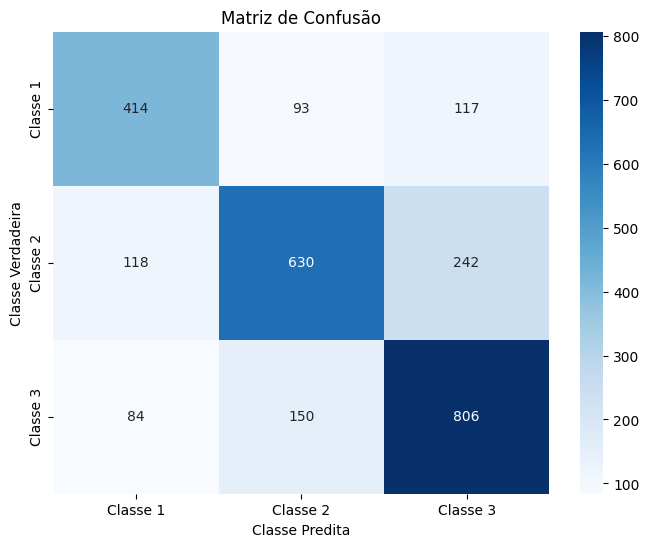

In [47]:
cm = confusion_matrix(y_test, y_pred_classes)
classes = ['Classe 1', 'Classe 2', 'Classe 3']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot
=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

### Exportação com a biblioteca pickle

In [48]:
with open('redeNeural_base_sprint4.pkl', 'wb') as arquivo:
    pickle.dump(model_rede_neural_df, arquivo)
with open('redeNeural_base_sprint4.pkl', 'rb') as arquivo:
    redeNeural_base_sprint4 = pickle.load(arquivo)

## Construção da rede neural + resultados - word2vec com cbow

A rede neural abaixo foi desenvolvida com o tutorial mencionado no ínicio do notebook, que, nesse caso o dataframe utilizado é a variável do Word2Vec com o CBoW. 

### Dataframe do word2vec com o cbow


In [49]:
df_vec

,Frase,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,...,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50,sentimento
0,"[alvarez, marsal, estar, conosco, sportainmet,...",0.214823,-0.123036,0.220707,-0.079739,-0.019442,0.202300,0.073742,0.042477,0.057268,...,0.012086,-0.096122,0.148153,0.092629,-0.027504,0.149860,-0.029617,0.032065,0.190372,1
1,"[btgpactual, with, make_repost, entendar, impa...",0.220860,-0.123713,0.205813,-0.063700,-0.010433,0.195687,0.072226,0.026175,0.058045,...,0.006447,-0.076174,0.157446,0.085306,-0.001963,0.156306,-0.019182,0.035594,0.192635,1
2,"[minuto, touro, ouro]",0.265227,-0.068285,0.152235,-0.044329,-0.102729,0.141353,0.092800,0.113174,0.015783,...,0.078032,-0.202677,0.155750,0.062291,0.007038,0.134573,0.014635,0.034189,0.345674,2
3,"[querer, saber, banking, administrar]",0.189241,-0.169407,0.281181,-0.093912,-0.001968,0.181633,0.080923,0.055674,0.103454,...,0.092738,-0.160601,0.179499,0.091803,-0.063762,0.171190,-0.043618,0.030563,0.196250,2
4,"[início, guerra, rússia, ucrânia, velho, apare...",0.219838,-0.138311,0.229412,-0.057420,-0.014510,0.212875,0.058865,0.068096,0.060398,...,0.040836,-0.112662,0.170401,0.094290,-0.046000,0.168181,-0.018029,0.027667,0.180134,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,"[excelente, explicação]",0.190917,-0.133475,0.241675,-0.053180,0.067256,0.201138,0.034109,-0.078718,-0.066131,...,-0.082151,0.016113,0.154861,0.068700,-0.004302,0.079717,-0.028388,-0.017448,0.188785,2
8036,"[atendar, telefone, amor, deus]",0.188641,-0.119377,0.199339,-0.105448,0.023176,0.178837,0.069476,-0.004494,0.034710,...,0.034035,-0.126673,0.165176,0.080313,-0.024160,0.118848,-0.003502,0.087053,0.215656,2
8037,"[grande, fiis, mercado, não, selecionar, princ...",0.219437,-0.141124,0.217854,-0.065569,-0.020409,0.205403,0.061334,0.041665,0.063050,...,0.031438,-0.099000,0.176588,0.092546,-0.046104,0.145734,-0.019857,0.029422,0.183504,2
8038,"[erro, financeiro, eliminar, parar, ostentar, ...",0.218153,-0.146420,0.245234,-0.056113,-0.036187,0.224789,0.074320,0.045111,0.040841,...,0.035260,-0.126793,0.171115,0.095479,-0.033473,0.158747,-0.006721,0.029326,0.198914,1


### Separação treino e teste

In [50]:
x, y = df_vec["Frase"], df_vec["sentimento"]

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

words = ["o", "ao", 'aos', 'os', 'a', 'as', 'e', 'um', 'uma', 
        'ele', 'ela', 'eles', 'elas', 'do', 'da', 'dos', 'das', 
        'de', 'no', 'na', 'nos', 'nas', 'pelo', 'pela', 'pelos', 
        'pelas', 'num', 'numa', 'nuns', 'numas', 'dum', 'duma', 
        'duns', 'dumas']

x_filter = []

for title in x:
  for word in words:
    title = title.replace(word, '')
  x_filter.append(title)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_filter)

vocab = len(tokenizer.word_docs) + 1

x_filter = tokenizer.texts_to_sequences(x_filter)

max_length = max([len(z) for z in x_filter])
x_filter = pad_sequences(x_filter, maxlen=max_length, padding='post')

x_train, x_test, y_train, y_test = train_test_split(x_filter, y, test_size=0.33)

print("Tamanho de x:", len(x_filter))
print("Tamanho de y:", len(y))


Tamanho de x: 8040
Tamanho de y: 8040


### Criação do modelo

In [51]:
import tensorflow as tf
from tensorflow.keras import backend as K

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

model_df_vec = Sequential()
model_df_vec.add(Embedding(input_dim=vocab, output_dim=80, input_length=max_length, trainable=True))
model_df_vec.add(GlobalMaxPooling1D())
model_df_vec.add(Dropout(0.3))
model_df_vec.add(Dense(units=3, activation='softmax'))

model_df_vec.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[recall])

mc = ModelCheckpoint('weight.best.hdf5', monitor='val_acc', save_best_only=True, mode='max')

model_df_vec.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=10, callbacks=[mc])

print(model_df_vec.evaluate(x_test, y_test))


Epoch 1/10
168/169 [============================>.] - ETA: 0s - loss: 1.0417 - recall: 1.3919

169/169 [==============================] - 5s 28ms/step - loss: 1.0419 - recall: 1.3940 - val_loss: 0.9914 - val_recall: 1.2406
Epoch 2/10
168/169 [============================>.] - ETA: 0s - loss: 0.9063 - recall: 1.2049

169/169 [==============================] - 5s 28ms/step - loss: 0.9063 - recall: 1.2054 - val_loss: 0.8797 - val_recall: 1.1825
Epoch 3/10
167/169 [============================>.] - ETA: 0s - loss: 0.7650 - recall: 1.1907

169/169 [==============================] - 6s 36ms/step - loss: 0.7653 - recall: 1.1889 - val_loss: 0.8040 - val_recall: 1.1798
Epoch 4/10
167/169 [============================>.] - ETA: 0s - loss: 0.6495 - recall: 1.1732

169/169 [==============================] - 5s 29ms/step - loss: 0.6485 - recall: 1.1713 - val_loss: 0.7634 - val_recall: 1.1606
Epoch 5/10
168/169 [============================>.] - ETA: 0s - loss: 0.5512 - recall: 1.1500

169/169 [==============================] - 5s 28ms/step - loss: 0.5514 - recall: 1.1501 - val_loss: 0.7377 - val_recall: 1.1415
Epoch 6/10
169/169 [==============================] - ETA: 0s - loss: 0.4717 - recall: 1.1053

169/169 [==============================] - 7s 39ms/step - loss: 0.4717 - recall: 1.1053 - val_loss: 0.7254 - val_recall: 1.1273
Epoch 7/10
167/169 [============================>.] - ETA: 0s - loss: 0.4083 - recall: 1.1007

169/169 [==============================] - 6s 34ms/step - loss: 0.4088 - recall: 1.0993 - val_loss: 0.7218 - val_recall: 1.1194
Epoch 8/10
168/169 [============================>.] - ETA: 0s - loss: 0.3612 - recall: 1.0817

169/169 [==============================] - 5s 27ms/step - loss: 0.3609 - recall: 1.0821 - val_loss: 0.7254 - val_recall: 1.0929
Epoch 9/10
169/169 [==============================] - ETA: 0s - loss: 0.3110 - recall: 1.0776

169/169 [==============================] - 6s 33ms/step - loss: 0.3110 - recall: 1.0776 - val_loss: 0.7274 - val_recall: 1.1029
Epoch 10/10
167/169 [============================>.] - ETA: 0s - loss: 0.2743 - recall: 1.0659

83/83 [==============================] - 0s 3ms/step - loss: 0.7395 - recall: 1.0930
[0.7394887804985046, 1.0929937362670898]


### Relatório de Classificação e matiz de confusão

In [52]:
y_pred_probs = model_df_vec.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1) 

classification = classification_report(y_test, y_pred_classes)

print("\nRelatório de Classificação:")
print(classification)

83/83 [==============================] - 0s 2ms/step

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.66      0.63      0.65       655
           1       0.71      0.64      0.68       969
           2       0.69      0.77      0.73      1030

    accuracy                           0.69      2654
   macro avg       0.69      0.68      0.68      2654
weighted avg       0.69      0.69      0.69      2654



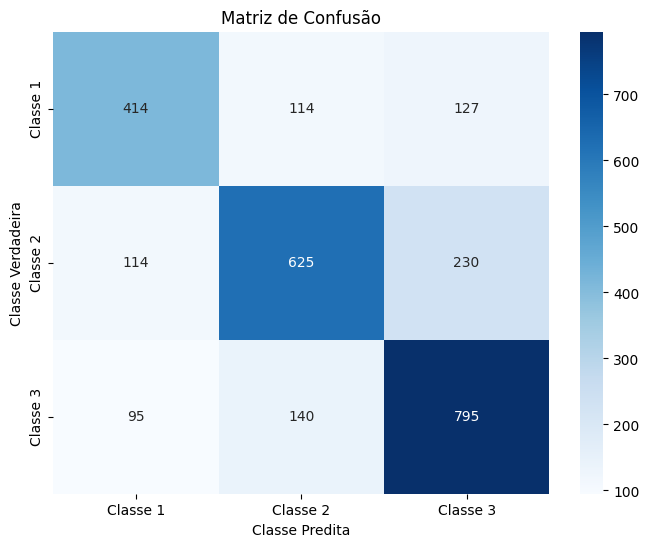

In [53]:
cm = confusion_matrix(y_test, y_pred_classes)
classes = ['Classe 1', 'Classe 2', 'Classe 3']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

### Exportação com a biblioteca pickle

In [54]:
with open('redeNeural_word2vec_cbow_sprint4.pkl', 'wb') as arquivo:
    pickle.dump(model_df_vec, arquivo)
with open('redeNeural_word2vec_cbow_sprint4.pkl', 'rb') as arquivo:
    redeNeural_word2vec_cbow_sprint4 = pickle.load(arquivo)

## Construção da rede neural + resultados - word2vec com embedding layer

A rede neural abaixo foi desenvolvida com o tutorial mencionado no ínicio do notebook, que, nesse caso o dataframe utilizado é a variável do Word2Vec com Embedding Layer.

### Dataframe do word2vec com embedding layer

In [55]:
df_word2vec

,texto_tratado,sentimentoNumerico,Vetor0,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,...,Vetor90,Vetor91,Vetor92,Vetor93,Vetor94,Vetor95,Vetor96,Vetor97,Vetor98,Vetor99
0,"[alvarez, marsal, estar, conosco, sportainmet,...",1,0.094304,0.010595,-0.397111,-0.213825,-0.096868,-0.150811,-0.081778,-0.248515,...,-0.030739,-0.109551,-0.408991,0.239490,0.045277,-0.145757,-0.126576,-0.341253,0.112681,-0.404745
1,"[btgpactual, with, make_repost, entendar, impa...",1,0.079590,-0.003012,-0.379120,-0.181318,-0.100006,-0.123750,-0.075979,-0.259364,...,-0.016204,-0.091153,-0.390758,0.223334,0.036749,-0.141859,-0.138499,-0.301150,0.085107,-0.366197
2,"[minuto, touro, ouro]",2,-0.058992,0.093160,-0.446223,-0.215018,-0.120606,-0.149266,-0.182133,-0.278258,...,0.024416,-0.155977,-0.512263,0.091846,-0.021999,-0.149556,-0.017749,-0.367553,0.142010,-0.493614
3,"[querer, saber, banking, administrar]",2,0.066400,0.017999,-0.379192,-0.178501,-0.066523,-0.186153,-0.111038,-0.186175,...,-0.026318,-0.084707,-0.358070,0.152308,0.081239,-0.082347,-0.110365,-0.333216,0.034648,-0.358150
4,"[início, guerra, rússia, ucrânia, velho, apare...",0,0.080786,0.043753,-0.406290,-0.211753,-0.119220,-0.139038,-0.069115,-0.274435,...,-0.010900,-0.108415,-0.416849,0.238709,-0.000605,-0.194385,-0.145031,-0.311953,0.120271,-0.390398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,"[excelente, explicação]",2,0.109362,0.120837,-0.302283,-0.253771,-0.207011,-0.179111,-0.022828,-0.383704,...,0.024119,-0.104490,-0.355246,0.143790,0.029682,-0.302476,-0.137765,-0.201375,0.047989,-0.418016
8036,"[atendar, telefone, amor, deus]",2,0.078462,0.077990,-0.427798,-0.218454,-0.079363,-0.133374,-0.099376,-0.284427,...,0.022377,-0.083084,-0.399377,0.218276,0.009737,-0.220777,-0.179361,-0.296153,0.079096,-0.397701
8037,"[grande, fiis, mercado, não, selecionar, princ...",2,0.085645,0.053970,-0.370721,-0.214953,-0.150349,-0.132409,-0.075531,-0.282082,...,0.016412,-0.107954,-0.422752,0.238254,-0.020344,-0.182422,-0.162531,-0.293555,0.129256,-0.375224
8038,"[erro, financeiro, eliminar, parar, ostentar, ...",1,0.067480,0.063514,-0.399180,-0.193365,-0.136526,-0.129383,-0.079998,-0.278936,...,-0.008266,-0.114887,-0.422500,0.244184,0.009556,-0.179193,-0.159718,-0.320875,0.121441,-0.401390


### Separação treino e teste


In [56]:
x, y = df_word2vec["texto_tratado"], df_word2vec["sentimentoNumerico"]

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

words = ["o", "ao", 'aos', 'os', 'a', 'as', 'e', 'um', 'uma', 
        'ele', 'ela', 'eles', 'elas', 'do', 'da', 'dos', 'das', 
        'de', 'no', 'na', 'nos', 'nas', 'pelo', 'pela', 'pelos', 
        'pelas', 'num', 'numa', 'nuns', 'numas', 'dum', 'duma', 
        'duns', 'dumas']

x_filter = []

for title in x:
  for word in words:
    title = title.replace(word, '')
  x_filter.append(title)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_filter)

vocab = len(tokenizer.word_docs) + 1

x_filter = tokenizer.texts_to_sequences(x_filter)

max_length = max([len(z) for z in x_filter])
x_filter = pad_sequences(x_filter, maxlen=max_length, padding='post')

x_train, x_test, y_train, y_test = train_test_split(x_filter, y, test_size=0.33)

print("Tamanho de x:", len(x_filter))
print("Tamanho de y:", len(y))


Tamanho de x: 8040
Tamanho de y: 8040


### Criação do modelo

In [57]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

model_df_word2vec = Sequential()
model_df_word2vec.add(Embedding(input_dim=vocab, output_dim=80, input_length=max_length, trainable=True))
model_df_word2vec.add(GlobalMaxPooling1D())
model_df_word2vec.add(Dropout(0.3))
model_df_word2vec.add(Dense(units=3, activation='softmax'))

model_df_word2vec.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[recall])

mc = ModelCheckpoint('weight.best.hdf5', monitor='val_acc', save_best_only=True, mode='max')

model_df_word2vec.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=10, callbacks=[mc])

print(model_df_word2vec.evaluate(x_test, y_test))


Epoch 1/10
168/169 [============================>.] - ETA: 0s - loss: 1.0463 - recall: 1.3877

169/169 [==============================] - 6s 33ms/step - loss: 1.0464 - recall: 1.3828 - val_loss: 1.0020 - val_recall: 1.1854
Epoch 2/10
169/169 [==============================] - ETA: 0s - loss: 0.9079 - recall: 1.2256

169/169 [==============================] - 5s 29ms/step - loss: 0.9079 - recall: 1.2256 - val_loss: 0.8762 - val_recall: 1.1824
Epoch 3/10
168/169 [============================>.] - ETA: 0s - loss: 0.7632 - recall: 1.1780

169/169 [==============================] - 4s 25ms/step - loss: 0.7631 - recall: 1.1792 - val_loss: 0.7930 - val_recall: 1.1708
Epoch 4/10
168/169 [============================>.] - ETA: 0s - loss: 0.6459 - recall: 1.1662

169/169 [==============================] - 5s 28ms/step - loss: 0.6458 - recall: 1.1685 - val_loss: 0.7474 - val_recall: 1.1668
Epoch 5/10
167/169 [============================>.] - ETA: 0s - loss: 0.5485 - recall: 1.1428

169/169 [==============================] - 5s 31ms/step - loss: 0.5476 - recall: 1.1416 - val_loss: 0.7258 - val_recall: 1.1347
Epoch 6/10
167/169 [============================>.] - ETA: 0s - loss: 0.4697 - recall: 1.1135

169/169 [==============================] - 4s 25ms/step - loss: 0.4700 - recall: 1.1125 - val_loss: 0.7112 - val_recall: 1.1459
Epoch 7/10
169/169 [==============================] - ETA: 0s - loss: 0.4017 - recall: 1.0940

169/169 [==============================] - 4s 25ms/step - loss: 0.4017 - recall: 1.0940 - val_loss: 0.7087 - val_recall: 1.1469
Epoch 8/10
169/169 [==============================] - ETA: 0s - loss: 0.3503 - recall: 1.0701

169/169 [==============================] - 7s 39ms/step - loss: 0.3503 - recall: 1.0701 - val_loss: 0.7117 - val_recall: 1.1470
Epoch 9/10
169/169 [==============================] - ETA: 0s - loss: 0.3028 - recall: 1.0631

169/169 [==============================] - 5s 29ms/step - loss: 0.3028 - recall: 1.0631 - val_loss: 0.7156 - val_recall: 1.1356
Epoch 10/10
168/169 [============================>.] - ETA: 0s - loss: 0.2681 - recall: 1.0622

83/83 [==============================] - 0s 3ms/step - loss: 0.7282 - recall: 1.1408
[0.7282272577285767, 1.1407665014266968]


### Relatório de Classificação e matiz de confusão

In [58]:
y_pred_probs = model_df_word2vec.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1) 

classification = classification_report(y_test, y_pred_classes)

print("\nRelatório de Classificação:")
print(classification)

83/83 [==============================] - 0s 2ms/step

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       676
           1       0.68      0.69      0.69       980
           2       0.70      0.72      0.71       998

    accuracy                           0.69      2654
   macro avg       0.69      0.68      0.69      2654
weighted avg       0.69      0.69      0.69      2654



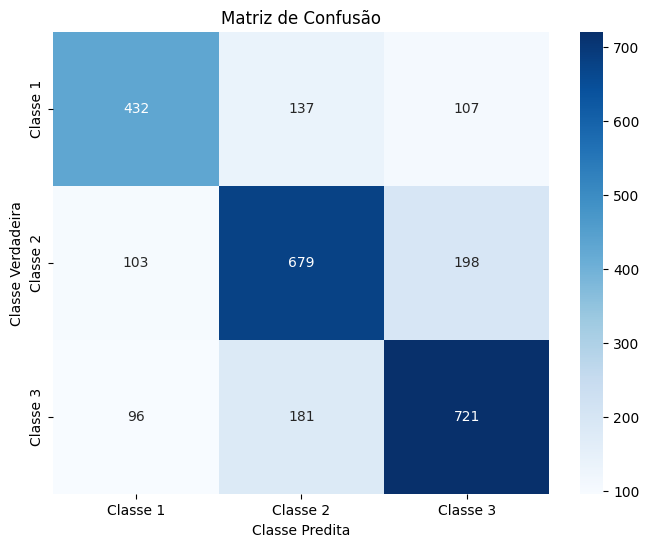

In [59]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_classes)
classes = ['Classe 1', 'Classe 2', 'Classe 3']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

### Exportação com a biblioteca pickle 

In [60]:
with open('redeNeural_word2vec_embedding_sprint4.pkl', 'wb') as arquivo:
    pickle.dump(model_df_word2vec, arquivo)
with open('redeNeural_word2vec_embedding_sprint4.pkl', 'rb') as arquivo:
    redeNeural_word2vec_embedding_sprint4 = pickle.load(arquivo)